# CS210 Spring 2019 - Sample Final Project 
# Movie Preferences 

### Movie Rating Data

#### Nur Hüseyin - 18017

## Project Description

In this project, my goal is to analyze and display statistical facts in different movie genres that indicates people who ranked high for action movies will rank mostly low for drama movies. I will explore how ratings are grouped in certain movie genres by choosing specific genres. 
In conclusion, I will group some of the movie genres and explore their correlation with ratings.

## Dataset

This dataset includes three raw csv files named as movies.csv, ratings.csv and tags.csv. I will be using movies and ratings files. Their manipulation will be explained in detailed below.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [46]:
from os.path import join
from pprint import pprint

In [47]:
path = "./data"
movies_file = "movies.csv"
ratings_file = "ratings.csv"


In [48]:
df_movies = pd.read_csv(join(path, movies_file))
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


movie.csv datatset has movieId, title and genres information in it. We use movieId and genres. We will have connection between other data from movieId information.
ratings data has userId, movieId and rating information.

In [49]:
df_ratings = pd.read_csv(join(path, ratings_file), nrows=100000)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [50]:
n_rows, n_columns = df_movies.shape  # get the shape of dataframe
print("number of rows in movies data: {}, number of columns in movies data: {}".format(n_rows, n_columns))

number of rows in movies data: 27278, number of columns in movies data: 3


In [51]:
n_rows, n_columns = df_ratings.shape  # get the shape of dataframe
print("number of rows in ratings data: {}, number of columns in ratings data: {}".format(n_rows, n_columns))

number of rows in ratings data: 100000, number of columns in ratings data: 4


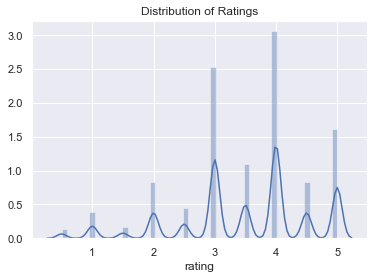

In [52]:
sns.distplot(df_ratings["rating"].values, norm_hist=True)  # games played

plt.xlabel("rating")
plt.title("Distribution of Ratings")
plt.show()

In [53]:
df_ratings.drop(["timestamp"], axis=1, inplace=True)
df_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


### Preprocessing

Since we don't use timestamp information, we delete(drop) it from the dataset. Preprocessing will be faster this way.

In the below code segment, we have created 2 new columns. These columns have information about movies only which have genre that includes "Action" and "Drama" in it. Genres that includes both "Action" and "Drama" also didn't taken to considiration. Instead of float("NaN") value, I have used 100 because it will be easier in next steps. In addition, since we don't have a rank 100, it is proper to use.

In this project, I want to show that people who ranked high for Drama movies voted low for Action movies and vice versa.


In [54]:
df_ratings["rating_of_drama_movies"] = df_ratings["rating"]
drama_movies_movieId = df_movies[df_movies["genres"].str.contains("Drama")]["movieId"]

df_ratings["rating_of_action_movies"] = df_ratings["rating"]
action_movies_movieId = df_movies[df_movies["genres"].str.contains("Action")]["movieId"]
i=0
for element in df_ratings.movieId:
    if element in drama_movies_movieId:
        if element in action_movies_movieId:
            df_ratings["rating_of_drama_movies"][i] = 100
            df_ratings["rating_of_action_movies"][i] = 100 
        else:
            df_ratings["rating_of_drama_movies"][i] = df_ratings["rating"][i]
            df_ratings["rating_of_action_movies"][i] = 100        
    else:
        if element in action_movies_movieId:
            df_ratings["rating_of_drama_movies"][i] = 100
            df_ratings["rating_of_action_movies"][i] = df_ratings["rating"][i]
        else:
            df_ratings["rating_of_drama_movies"][i] = 100
            df_ratings["rating_of_action_movies"][i] = 100
    i=i+1

In the below code segment, I created a new DataFrame. This will be the dataset I use mainly. It has unique userId, this is its difference from rating.csv data. In the next code segment, I calculated average ratings these users voted for both Drama and Action included movies, diversely. 
"numdrama" and "numaction" columns are the number of movies this user voted which includes Drama and Action in its genre, respectively.

In [55]:
# initialize list of lists 
data = list(dict.fromkeys(df_ratings["userId"])) 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['userId']) 
df["numdrama"] = np.zeros(len(df["userId"]))
df["numaction"] = np.zeros(len(df["userId"]))
df["drama_rating"] = np.zeros(len(df["userId"]))
df["action_rating"] = np.zeros(len(df["userId"]))

# print dataframe. 
df.shape



(702, 5)

In [56]:
i=0
while i< len(df_ratings["userId"]):
    if(df_ratings["rating_of_drama_movies"][i]!=100 or df_ratings["rating_of_action_movies"][i]!=100):
        if(df_ratings["rating_of_drama_movies"][i]!=100):
            a = df["drama_rating"][df["userId"]==df_ratings["userId"][i]]
            b = df["numdrama"][df["userId"]==df_ratings["userId"][i]]
            df["drama_rating"][df["userId"]==df_ratings["userId"][i]] = (a*b+df_ratings["rating_of_drama_movies"][i])/(b+1)
            df["numdrama"][df["userId"]==df_ratings["userId"][i]] = df["numdrama"][df["userId"]==df_ratings["userId"][i]]+1
        elif(df_ratings["rating_of_action_movies"][i]!=100):
            a = df["action_rating"][df["userId"]==df_ratings["userId"][i]]
            b = df["numaction"][df["userId"]==df_ratings["userId"][i]]
            df["action_rating"][df["userId"]==df_ratings["userId"][i]] = (a*b+df_ratings["rating_of_action_movies"][i])/(b+1)
            df["numaction"][df["userId"]==df_ratings["userId"][i]] = df["numaction"][df["userId"]==df_ratings["userId"][i]]+1
    i=i+1
    
            
        

In [57]:
df

,userId,numdrama,numaction,drama_rating,action_rating
0,1,76.0,22.0,3.723684,3.704545
1,2,27.0,8.0,4.259259,3.750000
2,3,78.0,19.0,4.051282,4.368421
3,4,11.0,4.0,3.636364,3.750000
4,5,29.0,10.0,4.310345,4.300000
5,6,11.0,0.0,3.454545,0.000000
6,7,113.0,25.0,3.283186,3.640000
7,8,30.0,7.0,3.833333,4.428571
8,9,15.0,4.0,3.400000,2.750000
9,10,20.0,4.0,3.900000,4.000000


In [58]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows in ratings data: {}, number of columns in ratings data: {}".format(n_rows, n_columns))

number of rows in ratings data: 702, number of columns in ratings data: 5


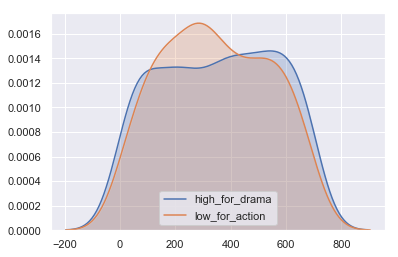

In [59]:
drama_high = df[(df["drama_rating"] > 3.5)]
action_low = df[(df["action_rating"] < 3.5)]

ax = sns.kdeplot(drama_high["userId"].rename("high_for_drama"), shade=True)
sns.kdeplot(action_low["userId"].rename("low_for_action"), ax=ax, shade=True)

plt.show()

I try to prove that rating high for one genre will be rating low for other genre. Above, graph is according to rating high for Drama and low for Action.
Now, I applied a significance test to statistically approve this difference. Here, we created two different samples, extracting values only for users which rated high for drama movies. They rated for action movies aswell. We compare mean of drama with mean of action in scope of users that rated high for drama. Since we have two samples, we simply decided to apply two-sample t-test to show that two eras are different.
Below, you may find the hypothesis statements.


$H_0 \rightarrow \mu_{ratings-for-action-movies} = \mu_{ratings-for-drama-movies}$  
$H_A \rightarrow \mu_{ratings-for-action-movies} \neq \mu_{ratings-for-drama-movies}$

In [60]:
# extracting values only for users which rated high for drama movies.
drama = drama_high["drama_rating"].values
action = drama_high["action_rating"].values

In [61]:
stats.ttest_ind(drama, action, equal_var=False)  
# since we have not equal variances

Ttest_indResult(statistic=2.947813420785039, pvalue=0.0033385778154450554)

We set the significance level as 0.05 as general.  
Based on the value of obtained p_value, we can **reject** the null hypothesis. In addition, the test score is positive which indicates that the mean score for students who completed the course is higher than those who did not.

# Second Phase of the Project
## Machine Learning Techniques

Outcome: Blog, Github and PDF

- Buiding two Models with a ML technique (decision tree vs.)
       
     I have built models with decision tree(classification) and k-nn

- Verify your Models (it does not have to be successful)

- Describe which one performs better and why. Try to describe which features works best for each ML Technique. (linear regression will not be counted as a ML Technique)

# Decision Tree

Decision trees are supervised Machine Learning algorithms. In the code, algorithm fits our data to the pretrained tree model and works on learning using this model. 

I will use classification, So I shoul have two values for features that will be learned. So, I change my rating data to high and low values which will be referred as 1 and 0 respectively. When rating is bigger than 3.5, it is high rated(1) and when less than 3.5, low rated(0). Below two code segments are for this pupose.

In [62]:
i=0
for element in df["drama_rating"]:
    if element<3.5:
        df["drama_rating"][df["drama_rating"].index[i]]= 0
    else:
        df["drama_rating"][df["drama_rating"].index[i]]=1
    i=i+1

In [63]:
i=0
for element in df["action_rating"]:
    if element<3.5:
        df["action_rating"][df["action_rating"].index[i]]= 0
    else:
        df["action_rating"][df["drama_rating"].index[i]]=1
    i=i+1

In [64]:
df.head()

,userId,numdrama,numaction,drama_rating,action_rating
0,1,76.0,22.0,1.0,1.0
1,2,27.0,8.0,1.0,1.0
2,3,78.0,19.0,1.0,1.0
3,4,11.0,4.0,1.0,1.0
4,5,29.0,10.0,1.0,1.0


I am using the data I have created(df) which includes userId, number of ratings done and average ratings for certain genres. 

I am interested in drama ratings of the data. To be more precise, I will ask if the user ranked low or high for the movies with genres that includes Drama.(on average of course since we have created this data using average values.)
My decision label should be "drama_rating" column.
We can use other data as features to predict the decision label

In [65]:
# We can divide decision label and features as;
X = df.drop('drama_rating', axis=1) # these are features
y = df['drama_rating']              # this is what we want to predict

In [66]:
from sklearn.model_selection import train_test_split

# This will create us train and test datasets from the original dataset that we have where
# 70% of original dataframe will be train set and 30% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)


In [67]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [68]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
y_predict = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.6777251184834123

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[ 42,  31],
       [ 37, 101]], dtype=int64)

In [72]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted low rate', 'Predicted high rate'],
    index=['True low rate', 'True high rate'])

,Predicted low rate,Predicted high rate
True low rate,42,31
True high rate,37,101


# K-Nearest Neighbors Algorithm

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Let's try with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [74]:
# We can use our model to predict values in the test as
y_pred = knn.predict(X_test)

In [75]:
# Checking the performance of the model with accuracy score;
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.5781990521327014


In [76]:
# Trying with k = 7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)
print("Accuracy of the model with k = 7 :",metrics.accuracy_score(y_test, y_pred_7))

Accuracy of the model with k = 7 : 0.5829383886255924


In [77]:
accuracy_list = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

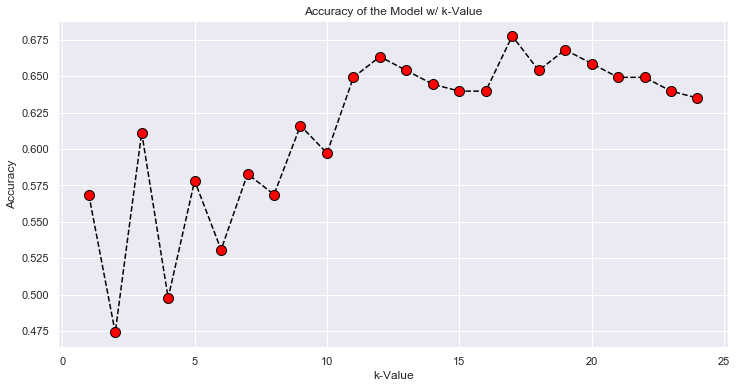

In [78]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [79]:
normalized_df = (df-df.mean()) / df.std()

In [80]:
normalized_df.head()

,userId,numdrama,numaction,drama_rating,action_rating
0,-1.728353,0.236119,0.532721,0.757082,0.740868
1,-1.723422,-0.362276,-0.249293,0.757082,0.740868
2,-1.718491,0.260543,0.365146,0.757082,0.740868
3,-1.713560,-0.557670,-0.472725,0.757082,0.740868
4,-1.708628,-0.337852,-0.137576,0.757082,0.740868


In [81]:
X_norm = normalized_df.drop('drama_rating', axis=1)

# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.25, random_state = 42)

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy of the model with k = 5 and using normalized features: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 and using normalized features:  0.6704545454545454


In [83]:
accuracy_list_norm = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list_norm.append(metrics.accuracy_score(y_test, y_pred))

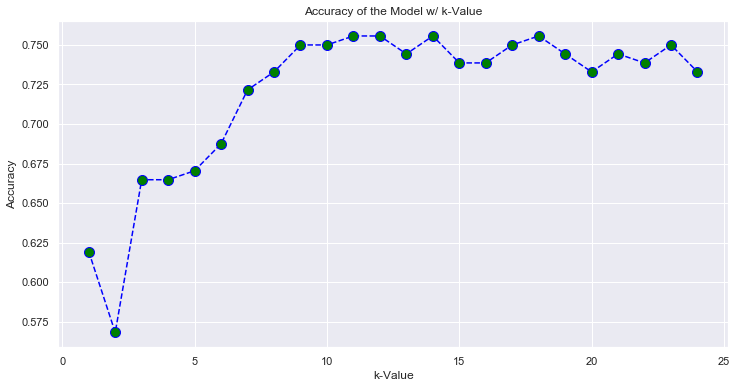

In [84]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list_norm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

## Describe which one performs better and why. Describe which features works best for each ML Technique. 

I have obtained 0.6777251184834123 accuracy with decision tree model. With k-NN approach, I can have around 0.76 acurracy best with k=11.
My accuracy result are less than wanted, if it would be more than 0.9 I would say training is successfull. This accuracy results are not bad, but not good either.
I had better results using k-NN model since my data was more proper for this approach.

k-NN is used for classification while decision tree can be used for both classification and regression.That means both can be used for classification. Since I have manipulated my data for classification, they are both usable for me.

k-NN determines neighborhoods of the data. It assigns a distance metric. This is why when using k-NN, all features must be numeric. k-NN has low-cost while training and high-cost while prediction.

Decision Tree classifier first build a classification model on the training dataset and then classify. We even used a created model and fit our data on it. However k-NN classifier does not build any classification model. It directly learns from the training instances (observations). It starts processing data only after it is given a test observation to classify. This approach is more lazy.

Decision trees sometimes may cause overfitting which means it gives highly accurate output on training data, but low accurate output on test data. Decision trees typically don't improve over linear classifiers when we have lots of features. They may fail badly on problems that linear classifiers perform well on.

My data uses action movies as features and drama movies as label. From previous works, we know this are correlated. So, our data is better when used with k-NN. 

